In [1]:
import covid19_data as covid19 # Data from Johns Hopkins University Center
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

In [2]:
br = covid19.jsonByName("Brazil")

In [3]:
print(br)

{'Confirmed': 4345610, 'Deaths': 132006, 'Recovered': 3770138, 'Active': 443466}


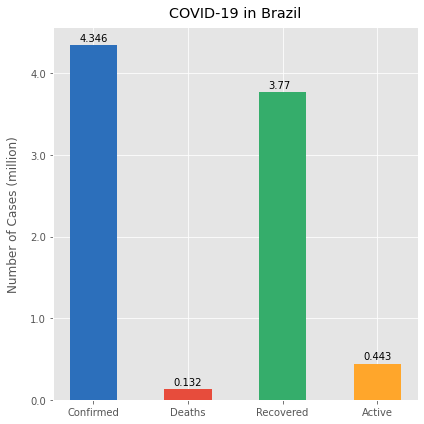

In [4]:
plt.style.use('ggplot') # ggplot theme
fig, ax = plt.subplots(figsize=(6, 6))

width = 0.5  #width of the bars
x_pos = np.arange(len(br)) # the label locations
x = br.values()
color = ['#2c6fbb','#e74c3c','#35ad6b','#ffa62b']

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.bar(x_pos, x, width, align='center', color = color)
ax.set_xticks(x_pos)
ax.set_xticklabels(br.keys()) # x label
ax.set_ylabel('Number of Cases (million)',labelpad=10) # y label
ax.set_title('COVID-19 in Brazil', pad=10) # title

# convert the numbers in million notation
formatter = ticker.FuncFormatter(lambda x,z: x/10**6) 
ax.yaxis.set_major_formatter(formatter)

# display the values at the top of each bar
for i, v in enumerate(x): 
    plt.text(i- 0.15, v+(10**4.7), str(round(v/10**6,3)))

fig.tight_layout()
plt.show()

In [5]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

confirmed = pd.read_csv(url)
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [10]:
br_confirmed = confirmed.loc[confirmed['Country/Region'] == 'Brazil']

In [11]:
br_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,4123000,4137521,4147794,4162073,4197889,4238446,4282164,4315687,4330455,4345610


In [12]:
br_confirmed = br_confirmed.iloc[0,4:]
dates = pd.to_datetime(br_confirmed.index)

In [16]:
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

deaths = pd.read_csv(url2)
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,312,316,319,321,322,324,327,330,334,338
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,117,117,120,124,126,130,131,132,134,136


In [26]:
br_deaths = deaths.loc[deaths['Country/Region'] == 'Brazil']
br_deaths = br_deaths.iloc[0,4:]

In [20]:
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

recovered = pd.read_csv(url3)
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,32481,32745,32985,33183,33379,33562,33723,33875,34037,34204
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,928,928,934,934,938,938,943,943,943,945
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1192,1198,1215,1215,1245,1277,1288,1289,1301,1324


In [27]:
br_recovered = recovered.loc[recovered['Country/Region'] == 'Brazil']
br_recovered = br_recovered.iloc[0,4:]

In [46]:
br = pd.concat([br_confirmed,br_deaths,br_recovered], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, verify_integrity=False, copy=True)
br.columns=['Confirmed','Deaths','Recovered']
br

,Confirmed,Deaths,Recovered
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/10/20,4238446,129522,3657701
9/11/20,4282164,130396,3695158
9/12/20,4315687,131210,3723206
9/13/20,4330455,131625,3723206


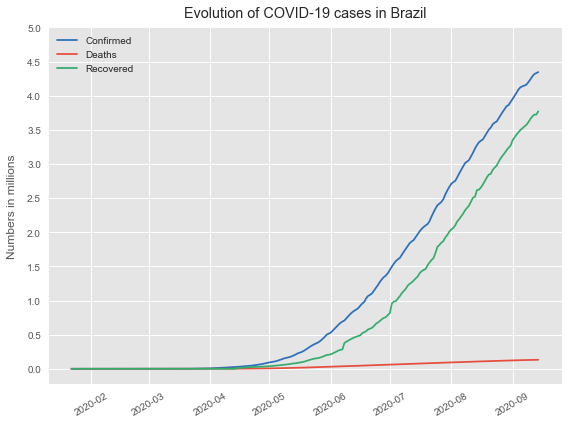

In [72]:
plt.style.use('ggplot') # ggplot theme

fig = plt.figure(figsize=(8, 6)) # graph size
ax = fig.add_subplot(111)
ax.plot(dates, list(map(lambda x:(x/10**6),br_confirmed)), label = 'Confirmed', color='#2c6fbb')
ax.plot(dates, list(map(lambda x:(x/10**6),br_deaths)), label = 'Deaths', color='#e74c3c')
ax.plot(dates, list(map(lambda x:(x/10**6),br_recovered)), label = 'Recovered', color='#35ad6b')
ax.legend()

#Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Numbers in millions',labelpad=10)
plt.title('Evolution of COVID-19 cases in Brazil', pad=10)
plt.xticks(rotation=30)
plt.yticks(np.arange(0,(max(br_confirmed)/10**6)+1, 0.5))

plt.tight_layout()
plt.show()
ax.grid()